In [1]:
# 引入模块
# -*- coding:utf-8 -*-

# 常用包的函数
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# 解决显示汉字不正确问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

pd.set_option('precision', 6) #设置精度
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
pd.options.display.max_rows = 100

In [2]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                     'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                      'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.70,0.18
1,bar,one,0.47,-0.76
2,foo,two,0.30,-0.94
3,bar,three,-0.15,-0.83
4,foo,two,1.23,-0.43
5,bar,two,1.07,0.58
6,foo,one,1.05,0.47
7,foo,three,-0.16,0.34


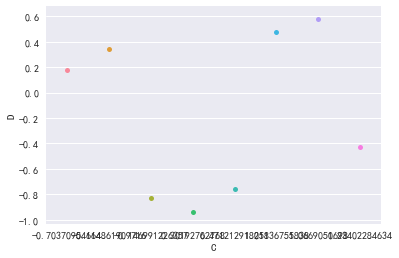

In [3]:
sns.stripplot(x="C", y="D", data=df)

In [7]:
df.astype(str)

,A,B,C,D
0,foo,one,0.80061107422,0.186562101533
1,bar,one,-0.226262579643,-0.649051760288
2,foo,two,0.662590616041,-2.32324734559
3,bar,three,-0.690122172797,-0.343589584524
4,foo,two,-0.897183676525,0.646060127994
5,bar,two,-0.396980262817,2.02064411923
6,foo,one,-1.15165842683,-0.335965508653
7,foo,three,-0.0927884781358,-1.07997091898


In [6]:
df.groupby(['A','B']).apply(str)

A    B    
bar  one            A    B     C     D\n1  bar  one -0.23 -0.65
     three         A      B     C     D\n3  bar  three -0.69...
     two              A    B     C    D\n5  bar  two -0.40 2.02
foo  one           A    B     C     D\n0  foo  one  0.80  0....
     three         A      B     C     D\n7  foo  three -0.09...
     two           A    B     C     D\n2  foo  two  0.66 -2....
dtype: object

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
df

,A,B,C,D
0,foo,one,0.80,0.19
1,bar,one,-0.23,-0.65
2,foo,two,0.66,-2.32
3,bar,three,-0.69,-0.34
4,foo,two,-0.90,0.65
5,bar,two,-0.40,2.02
6,foo,one,-1.15,-0.34
7,foo,three,-0.09,-1.08


In [12]:
df.groupby(['A']).mean()

,C,D
A,,
bar,-0.44,0.34
foo,-0.14,-0.58


In [15]:
dc = df[df['A'] == 'foo']
dc

,A,B,C,D
0,foo,one,0.80,0.19
2,foo,two,0.66,-2.32
4,foo,two,-0.90,0.65
6,foo,one,-1.15,-0.34
7,foo,three,-0.09,-1.08


In [16]:
# 定义函数,apply到group
def func1(group):
    #单品占有率
    group['E'] = group['C'] + group['D']
    return group

In [18]:
df.groupby(['A','B']).apply(func1)

,A,B,C,D,E
0,foo,one,0.80,0.19,0.99
1,bar,one,-0.23,-0.65,-0.88
2,foo,two,0.66,-2.32,-1.66
3,bar,three,-0.69,-0.34,-1.03
4,foo,two,-0.90,0.65,-0.25
5,bar,two,-0.40,2.02,1.62
6,foo,one,-1.15,-0.34,-1.49
7,foo,three,-0.09,-1.08,-1.17


In [19]:
df

,A,B,C,D
0,foo,one,0.80,0.19
1,bar,one,-0.23,-0.65
2,foo,two,0.66,-2.32
3,bar,three,-0.69,-0.34
4,foo,two,-0.90,0.65
5,bar,two,-0.40,2.02
6,foo,one,-1.15,-0.34
7,foo,three,-0.09,-1.08


In [21]:
df.set_index(['A','B'])

C     D
A   B                
foo one    0.80  0.19
bar one   -0.23 -0.65
foo two    0.66 -2.32
bar three -0.69 -0.34
foo two   -0.90  0.65
bar two   -0.40  2.02
foo one   -1.15 -0.34
    three -0.09 -1.08

In [23]:
df.reset_index()

,index,A,B,C,D
0,0,foo,one,0.80,0.19
1,1,bar,one,-0.23,-0.65
2,2,foo,two,0.66,-2.32
3,3,bar,three,-0.69,-0.34
4,4,foo,two,-0.90,0.65
5,5,bar,two,-0.40,2.02
6,6,foo,one,-1.15,-0.34
7,7,foo,three,-0.09,-1.08


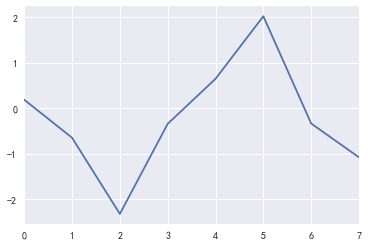

In [24]:
df['D'].plot()

In [27]:
df.groupby(['A','B'],as_index=False).sum()

,A,B,C,D
0,bar,one,-0.23,-0.65
1,bar,three,-0.69,-0.34
2,bar,two,-0.40,2.02
3,foo,one,-0.35,-0.15
4,foo,three,-0.09,-1.08
5,foo,two,-0.23,-1.68


In [35]:
da = df.groupby(['A','B']).mean()
da

C     D
A   B                
bar one   -0.23 -0.65
    three -0.69 -0.34
    two   -0.40  2.02
foo one   -0.18 -0.07
    three -0.09 -1.08
    two   -0.12 -0.84

In [40]:
da.unstack()

C                 D            
B     one three   two   one three   two
A                                      
bar -0.23 -0.69 -0.40 -0.65 -0.34  2.02
foo -0.18 -0.09 -0.12 -0.07 -1.08 -0.84

In [42]:
da.unstack().reset_index()

A     C                 D            
B        one three   two   one three   two
0  bar -0.23 -0.69 -0.40 -0.65 -0.34  2.02
1  foo -0.18 -0.09 -0.12 -0.07 -1.08 -0.84

In [43]:
da.to_csv("D:\lll.csv")

In [51]:
da.sort_values('C',ascending=False)

C     D
A   B                
foo three -0.09 -1.08
    two   -0.12 -0.84
    one   -0.18 -0.07
bar one   -0.23 -0.65
    two   -0.40  2.02
    three -0.69 -0.34